<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/Neural_Network_Multi_Classs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time
import keras

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
print(df.shape[0])

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus'] #cple
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
print(X.head())
names = ['subtype', 'class', 'indeks', 'n', 'm', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2',
         '(m/n)^3', 'av.length', 'std.dev', 'median', 'range', 'min', 'max', 'k']
#print(names[1])



8750
   subtype  class  indeks    n   m    n/m   (n/m)^2      (n/m)^3       m/n  \
0        4      1       6  220  80   2.75    7.5625    20.796875  0.363636   
1       13      1       1  100  10  10.00  100.0000  1000.000000  0.100000   
2       13      1       1   60   6  10.00  100.0000  1000.000000  0.100000   
3        4      2       5   88  32   2.75    7.5625    20.796875  0.363636   
4       11      6       4  180  30   6.00   36.0000   216.000000  0.166667   

    (m/n)^2   (m/n)^3   av.length     std.dev  median  range  min  max    k  
0  0.132231  0.048084   52.309090   28.644171    55.0     99    1  100   88  
1  0.010000  0.001000   52.730000   29.015100    53.0     96    2   98   61  
2  0.010000  0.001000   51.766666   29.513783    54.0     98    1   99   49  
3  0.132231  0.048084   63.352272   21.150820    63.0     79   21  100   50  
4  0.027778  0.004630  445.627777  145.289276   450.0    521  181  702  151  


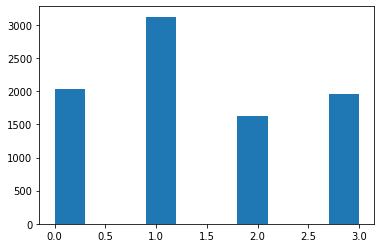

In [2]:
y_new = []
for val in y:
  if(val<10):
    y_new.append(0)
  elif(10 <= val and val <100):
    y_new.append(1)
  elif(100<=val and val<1000):
    y_new.append(2)
  else:
    y_new.append(3)

shuffled['y_new'] = y_new
#print(shuffled.head())
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)
plt.hist(y_new)
plt.show()
X_modified = X
#X_modified = X.drop(['n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'max', 'av.length'], axis = 1)
#print(X_modified.shape[1])

In [3]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)
y_encoded

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
classifier.add(Dense(8, input_dim = X_modified.shape[1], activation='relu'))
#classifier.add(Dense(8, activation = 'relu'))

classifier.add(Dense(16, activation = 'relu'))

#classifier.add(Dense(32, activation = 'relu'))
#classifier.add(Dense(32, activation = 'relu'))
#classifier.add(Dense(16, activation = 'relu'))

classifier.add(Dense(32, activation='relu'))

classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(16, activation='relu'))

classifier.add(Dense(4, activation = 'softmax'))
classifier.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 152       
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 4)                 68        
                                                                 
Total params: 4,060
Trainable params: 4,060
Non-trainabl

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y_encoded, random_state=0, train_size = 0.83)

X_train = scaler.fit_transform(X_train)
X_test_copy = X_test
print(X_test_copy.head(10))
X_test = scaler.fit_transform(X_test)

      subtype  class  indeks    n   m    n/m   (n/m)^2      (n/m)^3       m/n  \
7057        8      6       6  120  30   4.00   16.0000    64.000000  0.250000   
1638        9      1       6   72  16   4.50   20.2500    91.125000  0.222222   
277        14      3       5   44   4  11.00  121.0000  1331.000000  0.090909   
5546       13      2       5   60   6  10.00  100.0000  1000.000000  0.100000   
2570        4      3       3   22   8   2.75    7.5625    20.796875  0.363636   
7621        3      3       3  160  64   2.50    6.2500    15.625000  0.400000   
4318       14      1       4  132  12  11.00  121.0000  1331.000000  0.090909   
1995        3      1       1  160  64   2.50    6.2500    15.625000  0.400000   
2260       14      3       6   66   6  11.00  121.0000  1331.000000  0.090909   
3814       12      6       2  198  22   9.00   81.0000   729.000000  0.111111   

       (m/n)^2   (m/n)^3   av.length     std.dev  median  range  min  max    k  
7057  0.062500  0.015625  2

In [6]:
#classifier.fit(X_train, y_train, batch_size = 64, epochs = 20, verbose = 1)
#scores = classifier.evaluate(X_test, y_test)
#for i, m in enumerate(classifier.metrics_names):
#    print("\n%s: %.3f"% (m, scores[i]))
print(X_test_copy.iloc[0]['subtype'])

8.0


Epoch 1/600
454/454 [==============================] - 2s 3ms/step - loss: 0.7940 - accuracy: 0.6673 - val_loss: 0.5529 - val_accuracy: 0.7634
Epoch 2/600
454/454 [==============================] - 1s 2ms/step - loss: 0.5279 - accuracy: 0.7838 - val_loss: 0.4864 - val_accuracy: 0.7977
Epoch 3/600
454/454 [==============================] - 1s 3ms/step - loss: 0.4896 - accuracy: 0.7933 - val_loss: 0.4528 - val_accuracy: 0.8071
Epoch 4/600
454/454 [==============================] - 1s 3ms/step - loss: 0.4712 - accuracy: 0.8003 - val_loss: 0.4574 - val_accuracy: 0.8112
Epoch 5/600
454/454 [==============================] - 1s 3ms/step - loss: 0.4612 - accuracy: 0.8017 - val_loss: 0.4298 - val_accuracy: 0.8152
Epoch 6/600
454/454 [==============================] - 1s 3ms/step - loss: 0.4536 - accuracy: 0.8053 - val_loss: 0.4567 - val_accuracy: 0.8085
Epoch 7/600
454/454 [==============================] - 1s 2ms/step - loss: 0.4501 - accuracy: 0.8054 - val_loss: 0.4435 - val_accuracy: 0.8118

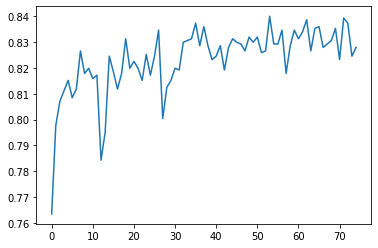

In [7]:
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 15, 
                                        restore_best_weights = True)
  
history = classifier.fit(X_train, y_train, batch_size = 16, 
                    epochs = 600, validation_data =(X_test, y_test), 
                    callbacks =[earlystopping])
plt.plot(history.history['val_accuracy'])



In [8]:
from keras.metrics import accuracy
#test_size = X_test.shape[0]
pred = classifier.predict(X_test)
#print(pred)
pred_ = np.argmax(pred, axis = 1)
#print(pred_)
pred_ = l_encode.inverse_transform(pred_)

true_y = l_encode.inverse_transform(np.argmax(to_categorical(y_test), axis = 1)[:,1])


#for i,j in zip(pred_, true_y):
#    print("Predicted: {}, True: {}".format(i, j))

cnt = 0
cnt_correct = 0

for i in range(len(pred_)):
  cnt += 1
  if(pred_[i] == true_y[i]):
    cnt_correct += 1
  if(pred_[i] == 0 and true_y[i]== 3):
    #print(X_test[i])
    for j in range(len(names)):
      print(names[j]+"->"+str(X_test_copy.iloc[i][names[j]]))
    print("------------------------------------------------------------------")

print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')

subtype->1.0
class->5.0
indeks->9.0
n->140.0
m->70.0
n/m->2.0
(n/m)^2->4.0
(n/m)^3->8.0
m/n->0.5
(m/n)^2->0.25
(m/n)^3->0.125
av.length->110.692856
std.dev->49.170376
median->108.0
range->284.0
min->3.0
max->287.0
k->98.0
------------------------------------------------------------------
subtype->1.0
class->5.0
indeks->6.0
n->200.0
m->100.0
n/m->2.0
(n/m)^2->4.0
(n/m)^3->8.0
m/n->0.5
(m/n)^2->0.25
(m/n)^3->0.125
av.length->101.815002
std.dev->50.574791
median->99.0
range->264.0
min->7.0
max->271.0
k->125.0
------------------------------------------------------------------
subtype->1.0
class->7.0
indeks->10.0
n->180.0
m->90.0
n/m->2.0
(n/m)^2->4.0
(n/m)^3->8.0
m/n->0.5
(m/n)^2->0.25
(m/n)^3->0.125
av.length->706.877808
std.dev->175.294418
median->749.5
range->848.0
min->256.0
max->1104.0
k->154.0
------------------------------------------------------------------
accuracy: 83.47%


accuracy: 83.47%


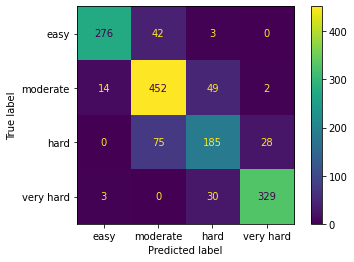

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#for i in range(len(pred_)):
#  print(true_y[i])
#print(confusion_matrix(true_y, pred_, labels=[0, 1, 2, 3]))
cm = confusion_matrix(true_y, pred_, labels=[0, 1, 2, 3])
cmd = ConfusionMatrixDisplay(cm, display_labels=['easy','moderate', 'hard', 'very hard'])
#plt.subplot(1, 2, 1)
cmd.plot()
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')

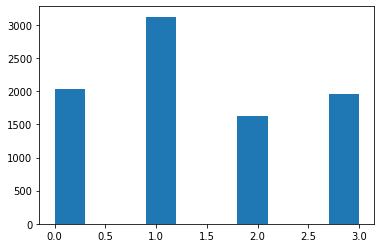

In [10]:
y_new = np.array(y_new)
plt.hist(y_new)
#plt.title('0->[0,2000) : 1->[2000,99999]')
plt.show()

ROC AUC score: 0.8819063395197881


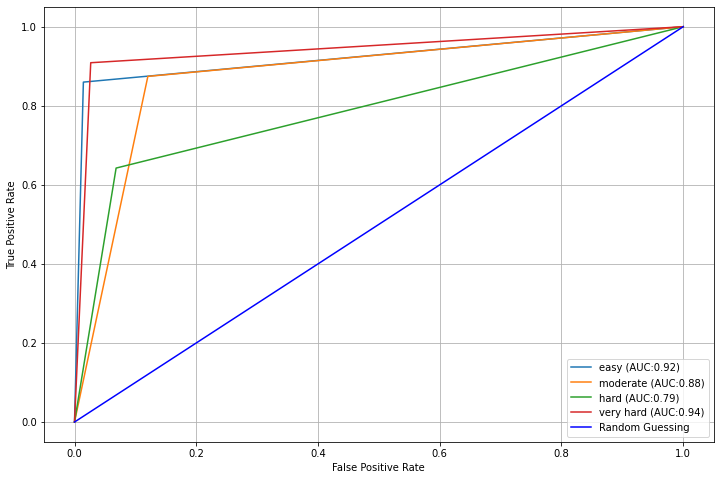

In [11]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['easy', 'moderate', 'hard', 'very hard']

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(true_y, pred_))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.grid()
plt.show()